# Comparing Physics and Performance of Traditional vs. Torpedo Bats

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction:
Recently in Major League Baseball, a new bat design has emerged, being called the 
“Torpedo Bat”. Traditional baseball bats have a continuous taper, with the radius getting 
gradually larger from the handle to the tip. Torpedo bats, as opposed to traditional baseball 
bats, have moved some of the mass from the end of the bat toward the handle. In other 
words, the torpedo bats reach the area of maximum radius sooner than traditional bats and 
then taper off smaller toward the end. This gives the torpedo bats a distinctive “bowling 
pin” shape, with the maximum radius about 6-7 inches from the bats tip. The intent in the 
design of these bats is to move the center of mass of the bat closer to the handle, to account 
for players that typically contact the ball further from the tip of the bat. 

This report focuses on physics in how the differing mass distributions (including 
where the center of mass is located) and contact locations (point at which the ball impacts 
the bat) affect the exit velocity of the baseball after contact. Exit velocity is critical for 
hitters’ performance, as a exit velocity has the greatest impact on a player’s batting average. 
Batting average is a batters’ hits (batting the pitch in play and reaching base safely) divided 
by at bats (plate appearances that result in either a hit or an out, which removes walks from 
the equation). To showcase how much exit velocity has an impact on batting average, we 
can look at the correlation between the two in Major League Baseball. Balls hit at 95 miles 
per hour (MPH) have a batting average of 0.265, whereas balls hit at 96 MPH have a batting 
average of just over 0.300. This jump of 0.035 over just one MPH is big in baseball, where 
batters have an average of 500-600 at bats per season. This means that jumping from 95 
MPH exit velocity to 96 MPH exit velocity translates to approximately 17.5-21 more hits 
each season. With the mass distribution having a great impact on swing speed, and swing 
speed and contact location having the largest impact on exit velocity, this report will be 
looking at how these two types of bats compare to one another.

## Maximum Radius and Mass Distribution Comparison
In order to make a fair comparison between the two bat types (to focus solely on bat 
design), the length of each bat will be kept constant at 34 inches. Also for this analysis, we 
will be considering the maximum diameter of the torpedo bat to be 6 inches from the end 
(opposite of the handle) of the bat, consistent with averages of these bat types. Finally, also 
going with averages across the MLB, the maximum diameter of the traditional versus 
torpedo bats will be considered to be 1.250 inches and 1.305 inches (maximum allowable 


radius per MLB regulations) respectively. Taking all of this in to account, we can model the 
mass distributions of the two bat types as shown in Figure 1 below.


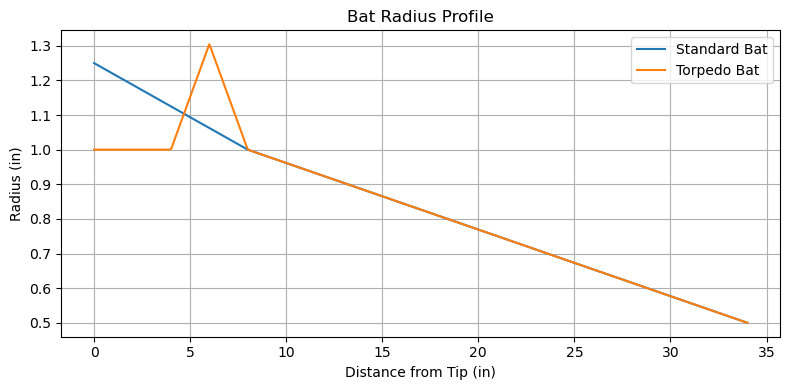

In [31]:
# Figure 1. Bat Geometry & Radius Profiles

length = 34 # Bat length in inches

x = np.linspace(0, length, 500) # 0 = tip, length = handle knob

# Standard bat: linear taper from max barrel radius to handle radius

r_std = np.interp(x, [0, 8, length], [1.25, 1.00, 0.50])

# Torpedo bat: bulge near mid-barrel (6" from tip), then taper

bulge_center = 6

bulge_width = 4

r_torp = np.interp(x,[0,bulge_center - bulge_width/2, bulge_center,
bulge_center + bulge_width/2, length], [1.00, 1.00, 1.305, 1.00,
0.50])

# Plot radius profiles

plt.figure(figsize=(8, 4))

plt.plot(x, r_std, label='Standard Bat')

plt.plot(x, r_torp, label='Torpedo Bat')

plt.xlabel('Distance from Tip (in)')

plt.ylabel('Radius (in)')

plt.title('Bat Radius Profile')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()

As expected, we see the radius of the torpedo bat peak at six inches from the tip and 
taper off both ways, with the traditional bat peaking at the tip and tapering down to the 
handle. Using this radius distribution, it is now possible to calculate the total mass as well as
map out the mass distribution of each of the two bat types. We will be considering both bats 
to be made of maple, the most common material for MLB bats to be made of. For this reason, 
the density used in the model will be 0.375 ounces per cubic inch, the average for maple 
bats. Using this density, the mass of the traditional bat is found to be 29.85 ounces, and the 
mass of the torpedo bat is 28.88 ounces -- a 0.97 ounce (or 3.3%) reduction from 
traditional. The mass distribution comparison can be seen below:

In [32]:
# Figure 2: Mass Distributions and COM

# Material density

density = 0.375 # ounces per cubic inch

# Cross-sectional areas (in²)

A_std = np.pi * r_std**2

A_torp = np.pi * r_torp**2

# Linear mass distributions (oz per inch)

m_lin_std = density * A_std

m_lin_torp = density * A_torp

# Integrate to find total mass (oz)

mass_std = np.trapz(m_lin_std, x)

mass_torp = np.trapz(m_lin_torp, x)

# Truncate to 0–28 inches from tip

cutoff = 28 # inches

mask = x <= cutoff

# Compute truncated total mass (optional)

mass_std_trunc = np.trapz(m_lin_std[mask], x[mask])

mass_torp_trunc = np.trapz(m_lin_torp[mask], x[mask])

# Compute truncated center of mass (inches from tip)

com_std_trunc = np.trapz(x[mask] * m_lin_std[mask], x[mask]) /mass_std_trunc

com_torp_trunc = np.trapz(x[mask] * m_lin_torp[mask], x[mask]) /mass_torp_trunc

# Print center of mass values

print(f"Center of mass (0–28 in) Standard bat: {com_std_trunc:.2f} in from tip")

print(f"Center of mass (0–28 in) Torpedo bat: {com_torp_trunc:.2f} in from tip")

Center of mass (0–28 in) Standard bat: 10.90 in from tip
Center of mass (0–28 in) Torpedo bat: 11.41 in from tip


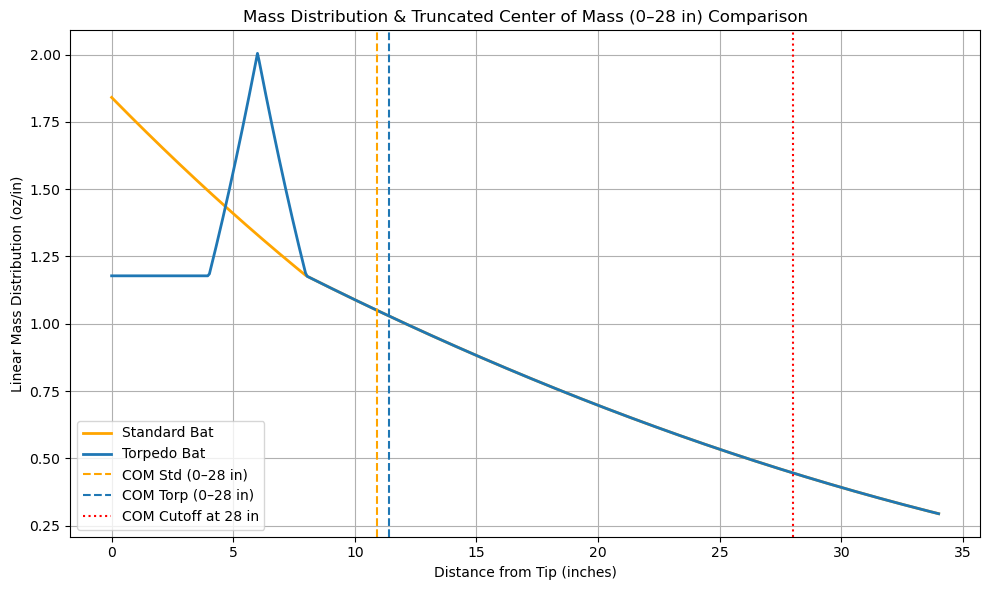

Total mass of standard bat: 29.85 oz
Total mass of torpedo bat: 28.88 oz


In [33]:
# Plot the mass distributions with COM color-matched

plt.figure(figsize=(10, 6))

line_std, = plt.plot(x, m_lin_std, 
                     label='Standard Bat',
                     linewidth=2, 
                     color='orange')

line_torp, = plt.plot(x, m_lin_torp, 
                      label='Torpedo Bat', 
                      linewidth=2)

# Retrieve distribution colors

color_std = line_std.get_color()

color_torp = line_torp.get_color()

# Plot COM and cutoff 

plt.axvline(com_std_trunc, linestyle='--', color=color_std,
linewidth=1.5, label='COM Std (0–28 in)')

plt.axvline(com_torp_trunc, linestyle='--', color=color_torp,
linewidth=1.5, label='COM Torp (0–28 in)')

plt.axvline(cutoff, linestyle=':', 
            color='red', 
            linewidth=1.5, 
            label='COM Cutoff at 28 in')

# Labels and styling

plt.xlabel('Distance from Tip (inches)')

plt.ylabel('Linear Mass Distribution (oz/in)')

plt.title('Mass Distribution & Truncated Center of Mass (0–28 in) Comparison')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()

print(f"Total mass of standard bat: {mass_std:.2f} oz")

print(f"Total mass of torpedo bat: {mass_torp:.2f} oz")

Finally, we can see where the center of mass (COM) of each bat is based on the mass 
distributions. For these calculations, we disregard the initial six inches from the handle 
know (28-34 on the graph), as this is the region where the bat is held from. Therefore, it 
should not be used to calculate the COM or factor into the future moment of inertia 
calculations. That being said, the truncated COM of the traditional bat sits at 10.90 inches 
from the tip and the torpedo bat COM is 0.51 inches further toward the hands, at 11.41 
inches from the tip.

## Swing Speed Comparison
Now that the truncated center of mass has been calculated for both the traditional 
and torpedo bats, it can be used to find the moment of inertia (MOI) about the pivot points 
for each bat. The pivot point is six inches from the handle knob, which is the industry 
standard for measuring moment of inertia of a baseball bat.

In [34]:
# Compute I_COM via integration about each COM (oz·in²)

I_com_std = np.trapz(m_lin_std * (x - com_std)**2, x)

I_com_torp = np.trapz(m_lin_torp * (x - com_torp)**2, x)

# Pivot point at 6 inches from the handle knob

pivot_x = length - 6 # inches from handle knob

# Distance from pivot to COM (inches)

r_COM_std_pivot = abs(pivot_x - com_std)

r_COM_torp_pivot = abs(pivot_x - com_torp)

# Moment of inertia about pivot (oz·in²)

I_pivot_std = I_com_std + mass_std * r_COM_std_pivot**2

I_pivot_torp = I_com_torp + mass_torp * r_COM_torp_pivot**2

# Print results

print(f"Pivot point: {pivot_x:.2f} in from tip")

print("Standard Bat:")

print(f" I_pivot: {I_pivot_std:.4f} oz·in²")

print("\nTorpedo Bat:")

print(f" I_pivot: {I_pivot_torp:.4f} oz·in²")

NameError: name 'com_std' is not defined

The MOI is found to be 11257.49 oz·in² for the traditional bat, and 10289.36 oz·in²
for the torpedo bat. The torpedo bat MOI being lower (a 968.03 oz·in², or 8.6% reduction) 
than traditional is what we expect to see, with more mass being closer to the pivot point. 
These values, along with the researched value for average MLB players torque applied 
about the to the pivot point and the average arc length (angle through which the bats are 
swung through), can now be used to calculate the average swing speeds for each bat type. 
For calculating the swing speed, it will be based on the “sweet spot” location. This is the 
location in which the exit velocity should be peaked, which is located approximately 
halfway between the COM and the tip (opposite of the handle) for each bat.

In [16]:
# 4. Impact radius (sweet spot halfway to COM)

r_imp_std_in = abs(pivot_x - com_std/2)

r_imp_torp_in = abs(pivot_x - com_torp/2)

# 5. Energy‐based swing model

arc_length_ft = 7.3 # ft

r_imp_std_ft = r_imp_std_in / 12

r_imp_torp_ft = r_imp_torp_in / 12

theta_std = arc_length_ft / r_imp_std_ft

theta_torp = arc_length_ft / r_imp_torp_ft

# 6. Torque for average swing speed

tau_avg = 10897.03 # in·oz

# Conversion factors

in_oz_to_lbf_ft = 1 / (16 * 12) # in·oz → lbf·ft

oz_in2_to_slug_ft2 = (1/16) * (1/144) / 32.174 # oz·in² → slug·ft²

mph_factor = (1/12) * 0.681818 # in/s → mph

# 7. Compute average speeds

def speed_mph(tau_oz_in, theta, I_pivot_oz_in2, r_imp_in):

# convert units internally

tau_lbf_ft = tau_oz_in * in_oz_to_lbf_ft

I_slug_ft2 = I_pivot_oz_in2 * oz_in2_to_slug_ft2

omega = np.sqrt(2 * tau_lbf_ft * theta / I_slug_ft2)

v_in_s = omega * r_imp_in

return v_in_s * mph_factor

# Calculate average swing speeds

v_std_avg = speed_mph(tau_avg,
theta_std, I_pivot_std, r_imp_std_in)

v_torp_avg = speed_mph(tau_avg, theta_torp, I_pivot_torp,
r_imp_torp_in)

# 8. Output

print(f"Average Standard Bat Speed at Sweet Spot: {v_std_avg:.1f}
mph")

print(f"Average Torpedo Bat Speed at Sweet Spot: {v_torp_avg:.1f}
mph")



SyntaxError: unterminated string literal (detected at line 57) (4081135871.py, line 57)

This gives us that the speed at the sweet spot for the traditional bat is 69.0 MPH, and 
the torpedo bat is 71.8 MPH. This is a noticeable jump of 2.8 MPH (4.1% gain), showcasing 
the swing speed advantages of the torpedo bats. We can further visualize this swing speed 
difference with the bar chart below.

In [19]:
# --- Error‐bar analysis over r_imp = COM/2 ± 3 in ---

n_samples = 100

# build the r_imp ranges

r_std_range = np.linspace(r_imp_std_in - 3, 
                          r_imp_std_in + 3,
                          n_samples)

r_torp_range = np.linspace(r_imp_torp_in - 3, 
                           r_imp_torp_in + 3,
                           n_samples)

# vectorized speed calls

v_std_samples = speed_mph(tau_avg, 
                          theta_std, 
                          I_pivot_std, 
                          r_std_range)

v_torp_samples = speed_mph(tau_avg, 
                           theta_torp, 
                           I_pivot_torp,
                           r_torp_range)

# compute statistics

v_std_mean, v_std_std = np.mean(v_std_samples), np.std(v_std_samples)

NameError: name 'r_imp_std_in' is not defined

In [20]:
v_torp_mean, v_torp_std = np.mean(v_torp_samples),
np.std(v_torp_samples)

# plot bar chart with error bars

plt.figure(figsize=(6,4))

labels = ['Standard', 'Torpedo']

means = [v_std_mean, v_torp_mean]

errs = [v_std_std, v_torp_std]

plt.bar(labels, means, yerr=errs, capsize=5)

plt.ylabel('Swing Speed (mph)')

plt.title('Mean Swing Speed ± Std Dev (r_imp = COM/2 ± 3″)')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

NameError: name 'v_torp_samples' is not defined

The bar chart shows both the swing speeds of both bats at the “sweet spot”, as well 
as error bars. These error bars showcase the swing speed at +/- 3 inches from the sweet 
spot location, accounting for variability in contact location. 

## Exit Velocity Comparison
Using all of the data we have calculated above (bat radius profile, mass distributions, 
swings speeds, etc.), we can finally create a program to model the differences in exit velocities between the two bats. For this, we will be considering the baseball to have a mass 
of 5.125 ounces and the pitch speeds to be 90 MPH, in order to solely focus on bat design
and performance. A Monte Carlo simulation can be run to model the exit velocities, with 
variations in the contact location, as well as swing speeds (variation is directly related to 
contact location). It also takes into account the variability of coefficient of restitution (e) of 
the ball-bat collision with contact location, using a sampling from a normal distribution to 
reflect this. For the normal distribution of e, the mean is 0.489 and the standard deviation is 
0.009, reflecting averages from maple bat coefficient of restitution data.



In [25]:
# 1. Simulation parameters

m_ball_oz = 5.125 # ball mass (oz)

pitch_speed_mph = 90 # pitch speed (mph)

N_samples = 10000 # number of Monte Carlo draws

# --- Sample COR from distribution ---

mean_e = 0.489 # average wood-bat COR from Nathan et al. (2011)

sigma_e = 0.009 # std. dev. from Nathan et al. (2011)

e_samps = np.random.normal(mean_e, sigma_e, N_samples)

e_samps = np.clip(e_samps, 0, 1) # ensure 0 ≤ e ≤ 1

# 2. Unit conversions

mph_to_fps = 5280/3600 # ft/s per mph

oz_to_slug = (1/16) / 32.174 # oz → lbm → slugs

v_pitch = -pitch_speed_mph * mph_to_fps # ft/s (negative = toward bat)

m_ball = m_ball_oz * oz_to_slug # slug

# 3. Precompute bat effective masses (slug) at the _mean_ sweet spot

# (we’ll recompute on the fly for each r_imp_sample below)

m_eff_std = (I_pivot_std / (r_imp_std_in**2)) * oz_to_slug

m_eff_torp= (I_pivot_torp / (r_imp_torp_in**2)) * oz_to_slug

# 4. Sample contact locations

r_std_samps = np.random.uniform(r_imp_std_in - 3, r_imp_std_in + 3, N_samples)

r_torp_samps = np.random.uniform(r_imp_torp_in - 3, r_imp_torp_in + 3, N_samples)

# 5. Compute swing speeds (mph → ft/s)

v_std_mph_samps = speed_mph(tau_avg,theta_std, I_pivot_std, r_std_samps)

v_torp_mph_samps = speed_mph(tau_avg, theta_torp, I_pivot_torp,r_torp_samps)

v_std_samps = v_std_mph_samps * mph_to_fps

v_torp_samps = v_torp_mph_samps * mph_to_fps

# --- Compute exit velocities with variable e ---

v_exit_std = (m_eff_std * v_std_samps+ m_ball * v_pitch+ m_eff_std * e_samps * (v_std_samps - v_pitch)) / (m_eff_std + m_ball)

v_exit_torp = (m_eff_torp * v_torp_samps+ m_ball * v_pitch+ m_eff_torp * e_samps *(v_torp_samps - v_pitch)) / (m_eff_torp + m_ball)

# 7. Back to mph

v_exit_std_mph = v_exit_std / mph_to_fps

v_exit_torp_mph = v_exit_torp / mph_to_fps

# 8. Plot histograms

plt.figure(figsize=(8,5))

plt.hist(v_exit_std_mph, bins=50, alpha=0.6, label='Standard')

plt.hist(v_exit_torp_mph, bins=50, alpha=0.6, label='Torpedo')

plt.xlabel('Exit Velocity (mph)')

plt.ylabel('Count')

plt.title('Monte Carlo Exit Velocity (contact ±3″)')

plt.legend()

plt.tight_layout()

plt.show()

# 9. Print mean ± 2σ

std_mu, std_sigma = np.mean(v_exit_std_mph), np.std(v_exit_std_mph)

torp_mu, torp_sigma = np.mean(v_exit_torp_mph), np.std(v_exit_torp_mph)

print(f"Standard bat exit: {std_mu:.1f} ± {2*std_sigma:.1f} mph (2σ)")

print(f"Torpedo bat exit: {torp_mu:.1f} ± {2*torp_sigma:.1f} mph (2σ)")

NameError: name 'I_pivot_std' is not defined

In the histogram, we can see that the data for the torpedo bats is shifted right 
(toward higher exit velocities) as compared to the traditional bats. The exit velocities (mean 
± 2σ) for each of the two bats are: 102.4 ± 12.9 mph (traditional), 103.0 ± 13.6 mph 
(torpedo). Although they are close, the 0.6 increase in mean exit velocity shows the effect on 
performance that the torpedo bat brings. We can now take a look at how both exit velocity 
and coefficient of restitution vary with contact location in the figure below. 



In [30]:
x_ss_std = pivot_x - com_std/2

x_ss_torp = pivot_x - com_torp/2

def e_profile(x_tip, x_center, sigma=2.0, e0=0.489):
    """Gaussian COR profile vs. contact-location x_tip (inches from tip)."""
    return e0 * np.exp(-0.5*((x_tip - x_center)/sigma)**2)

# 1) sample your impact‐locations in tip‐coordinates

x_tip = np.linspace(0, pivot_x, 500)

# 2) convert to lever arm

r_imp = pivot_x - x_tip

# 3) get swing speeds

v_std_mph = speed_mph(tau_avg, theta_std, I_pivot_std, r_imp)

v_torp_mph = speed_mph(tau_avg, theta_torp, I_pivot_torp, r_imp)

v_std_fps = v_std_mph * mph_to_fps

v_torp_fps = v_torp_mph * mph_to_fps

# 4) effective mass (slugs)

m_eff_std = (I_pivot_std * oz_in2_to_slug_ft2)/((r_imp/12)**2)

m_eff_torp = (I_pivot_torp * oz_in2_to_slug_ft2)/((r_imp/12)**2)

# 5) COR curves

e_std_curve = e_profile(x_tip, x_ss_std, sigma=2.0, e0=0.489)

e_torp_curve = e_profile(x_tip, x_ss_torp, sigma=2.0, e0=0.489)

# 6) exit‐velocity formula (ft/s)

v_exit_std = (

m_eff_std * v_std_fps

+ m_ball * v_pitch

+ m_eff_std * e_std_curve * (v_std_fps - v_pitch)

)/(m_eff_std + m_ball)

v_exit_torp= (

m_eff_torp * v_torp_fps

+ m_ball * v_pitch

+ m_eff_torp * e_torp_curve * (v_torp_fps - v_pitch)

)/(m_eff_torp + m_ball)

# back to mph

v_exit_std_mph = v_exit_std / mph_to_fps

v_exit_torp_mph = v_exit_torp / mph_to_fps

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x_tip, v_exit_std_mph, color='red', 
        label='Traditional Bat', linewidth=2)

ax.plot(x_tip, v_exit_torp_mph, color='blue', 
        label='Torpedo Bat', linewidth=2)

ax.set_xlim(0, pivot_x)

ax.set_xlabel('Distance from Pivot Point (inches)')

ax.set_ylabel('Exit Velocity (mph)')

ax.set_title('Exit Velocity vs Impact Location\n(with location-dependent COR)')

ax.legend()

ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

NameError: name 'pivot_x' is not defined

From this, it is apparent that the torpedo bat’s curve sits ~1 inch closer to the pivot 
point than the traditional bat’s curve, matching its slightly more inward sweet spot. Also, its 
maximum exit velocity at that peak is noticeably higher (By about 3.5 MPH), reflecting the 
lower moment of inertia you built into the torpedo design. This tells us that if you can 
consistently hit the torpedo bat’s sweet spot, you’ll get a measurable boost in exit velocity.

## Conclusion
Torpedo bats weigh 28.88 oz versus 29.85 oz for traditional bats (−3.3%), with the 
center of mass shifting from 10.90 inches to 11.41 inches from the tip and moment of inertia 
about a 6 inch pivot dropping by 8.6% (11,257.5 → 10,289.4 oz·in²) . This mass 
redistribution boosts sweet-spot swing speed from 69.0 mph to 71.8 mph (+4.1%) and 
raises mean exit velocity under a 90 MPH pitch by 0.6 MPH (102.4 → 103.0 mph) . This 
boost in exit velocity is crucial for players, as stated in the introduction, as any increase can 
have a great enhancement on players performance metrics. To wrap up, if a player is precise 
in their contact location, the torpedo bats can give a significant boost to player’s hitting 
success. 

## Sources
1. https://sports.yahoo.com/mlb/article/how-to-assess-the-impact-of-a-torpedo-bat-
these-are-the-stats-to-look-at-
211347005.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAAl3NQzBYIJ_3ACKX9TRlv19lImSI141GTuUgw8YiN
K9Yu0N8RvjWMj9KWVfZ5-
3pTQADO68rAda37hd1ih8Sqh8mgMqLRDRo9JggwbsdmTLYGNlWkKbZu8z-
cdGr1VQW4vIQyhFqGLBi31-NRWkCDJZlS6DTNqD9dUAu5S3Lwd5
2. https://blogs.fangraphs.com/the-physics-of-the-torpedo-bat/
3. https://winreality.com/blog/exit-velo-by-
age/#:~:text=Simply%20put%2C%20the%20harder%20a,300.
4. https://pebblehunting.substack.com/p/imagine-an-enormous-bat-barrel
5. https://www.physics.usyd.edu.au/~cross/baseball.html
6. https://baseballrulesacademy.com/official-rule/mlb/3-02-1-10-
bat/#google_vignette